<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;">
              <h1>
               <left>Determing Growth Rate</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: ASU CBP Summer School 2025
Instructor: Dr. Douglas Shepherd
Contact Info: douglas.shepherd@asu.edu
Authors: Dr. Douglas Shepherd
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2018 Griffin Chure

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/QI2lab/2025-CBP-SummerSchool/blob/main/Module4-BacteriaGrowth/M4B_Determining_Growth_Rate.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module4-BacteriaGrowth/M4B_Determining_Growth_Rate.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Learning Objectives
In this lesson, we are going to analyze and fit experimental data of bacteria dividing to determine their growth rate. After completing this lesson, you should be able to:
* Determine the distribution of cell division times from experimental data
* Fit the population growth to the exponential growth equation

# Using microscopy to measure bacterial growth

While we have just scraped the surface of growth in class, there is a seemingly endless reservoir of literature that explores the fascinating physiology of cellular growth. For a detailed summary, see [this review](https://jun.ucsd.edu/files/publications/Jun_ROPP_2018.pdf) by Suckjoon Jun and colleagues which gives both a historical accounting of bacterial growth physiology and a view of the future of the field.

As discussed in class and examined numerically in [Module 4A](M4A_ExponentialGrowth.ipynb), the continuous growth phase of a bacterial culture can be stated mathematically using the Exponetial Growth equation,

$$
N(t) = N_0 e^{rt}, \tag{1}
$$

where $N(t)$ is the number of cells at time $t$, $N_0$ is the initial number of cells and $r$ is the growth rate in dimensions of time.   Experimentally, it's difficult to count the number of cells in a large culture, but easy to measure for smaller colonies and cultures.

In this tutorial, we will use a movie of *E. coli* cells growing on a hard agar subtstrate at 100x magnification. Below, we have raw phase microscopy data (left), segmentation of individual cells (center), and the result of tracking individual cells and daughter cells (right).

<p style="text-align:center;">
  <span style="display:inline-block; margin:0 10px; text-align:center;">
    <img src="https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module4-BacteriaGrowth/Figures/data_gif.gif?raw=1" width="200" alt="Raw E. coli phase data" /><br>
    <strong>Phase data</strong>
  </span>
  <span style="display:inline-block; margin:0 10px; text-align:center;">
    <img src="https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module4-BacteriaGrowth/Figures/mask_gif.gif?raw=1" width="200" alt="Segemented E. coli phase data" /><br>
    <strong>Segmented</strong>
  </span>
  <span style="display:inline-block; margin:0 10px; text-align:center;">
    <img src="https://github.com/QI2lab/2025-CBP-SummerSchool/blob/main/Module4-BacteriaGrowth/Figures/tracked_gif.gif?raw=1" width="200" alt="Tracked E. Coli phase data" /><br>
    <strong>Tracked</strong>
  </span>
</p>

# More about microscopy data

While we often think of images as a colorful photograph, it is important to remember that at its core, a digital image is nothing but data. An image is a matrix of numbers upon which we can deploy mathematical operations. We'll download the data underlying the above movies to your Colab instance in the next code block.

In [16]:
# Download data
!pip install -q gdown
import gdown

# download the .zip containing the image data
file_id = "1nxY9-jEGmrH8elRdiMENFhBb64mMYl8q"
out = "/content/cbpSS2025.zip"
gdown.download(id = file_id, output=out,quiet=False)

# unzip data
!unzip -q /content/cbpSS2025.zip -d /content/cbpSS2025/

file_id = "1nW_-ouf_6THFhuoXNEL5GkcB3twmYQNS"
out = "/content/cbpSS2025/tracking_result.txt"

# Using the ID avoids any Drive viewer HTML
gdown.download(id=file_id, output=out, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nxY9-jEGmrH8elRdiMENFhBb64mMYl8q
From (redirected): https://drive.google.com/uc?id=1nxY9-jEGmrH8elRdiMENFhBb64mMYl8q&confirm=t&uuid=63272ea0-a312-46b2-aa4d-cf4ef1bcdb8e
To: /content/cbpSS2025.zip
100%|██████████| 32.0M/32.0M [00:00<00:00, 177MB/s]


replace /content/cbpSS2025/masks/Composite_00_cp_masks.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Downloading...
From: https://drive.google.com/uc?id=1nW_-ouf_6THFhuoXNEL5GkcB3twmYQNS
To: /content/cbpSS2025/tracking_result.txt
100%|██████████| 3.96k/3.96k [00:00<00:00, 7.31MB/s]


'/content/cbpSS2025/tracking_result.txt'

# Viewing "n" dimensional data in Python

We can view these timelapse data using an interactive viewer, such as [stackview](https://pypi.org/project/stackview/). To do this, we need to know a little more about the experiment itself. We often call this "metadata" and the information is critical to correctly analyzing experiments.

The camera used in these experiments has a pixel size of $6.5$ $\mu m$.
The objective used in the experiments has a magnficiation of $100$ $\times$.
The interval between pictures is $5$ minutes.

To know how big each pixel in our digital images is, we divide the camera pixel size by the microscope magnfication, $6.5/100$ $=$ $.065$ $\mu m$.

# data strat
use the max of each image as total cell count ?

In [9]:
# install pacakges for loading and viewing image data in colab
!pip install stackview==0.16.0 ipycanvas==0.11 numcodecs imagecodecs tifffile

ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [10]:
# import packages for loading and viewing image data in colab
from google.colab import output
output.enable_custom_widget_manager()

from pathlib import Path
import tifffile
import numpy as np
import stackview

## Raw data

We will first look at the raw data, which is acquired with [phase-contrast microscopy](https://www.ibiology.org/talks/phase-contrast-microscopy/) and [fluorescence microscopy](https://www.ibiology.org/talks/fluorescence-microscopy/). Phase-contrast microscopy is method that enchances the visibility of biological structures by manipulating the "phase" of the light passing through the sample. In this method, the bacteria cell bodies are darker than the surrounding environment. Fluorescence microscopy is a method that excites and collects light from fluorophores that are present in the bacteria. In this method, the bacteria cell bodies are brighter than the surrounding environment.

In [11]:
# load and view raw phase and fluorescence image data

raw_files = sorted(Path("/content/cbpSS2025/data/").glob("*.tif*"))
raw_data = []
for raw_file in raw_files:
  raw_data.append(tifffile.imread(raw_file))
raw_data = np.asarray(raw_data,dtype=np.uint16)
raw_data = np.squeeze(raw_data[:,0,:,:]) # remove GFP channel

stackview.slice(raw_data)

## Segmented phase-contrast data

The phase-contrast data has been passed through [cellpose](https://github.com/MouseLand/cellpose), a deep-learning Python package that excels at automatically finding cells. You can try cellpose out online for free [here](https://huggingface.co/spaces/mouseland/cellpose).

Starting from raw data, cellpose automatically finds unique cells and assigns all pixels within each cell a unique integer indentifier. This is called a mask image because it creates a unique mask for each pixel. A **critical** note here is that each image is segmented independently, so the mask identifier resets in each image. That means we can use this data to count the number of cells present at each time point.

In [16]:
# load and view segmented phase-contrast image data

mask_files = sorted(Path("/content/cbpSS2025/masks/").glob("*.tif*"))
mask_data = []
for mask_file in mask_files:
  mask_data.append(tifffile.imread(mask_file))
mask_data = np.asarray(mask_data,dtype=np.uint16)

stackview.slice(mask_data)

## Tracked phase-contrast data

While the segmented data is helpful to easily get the number of cells, we could extract more information from this simple experiment by quantifying the timing for cell divisions and cell lineages. To do this, we need the identifiers to stay the same for each cell and then mark when a cell division occurs. To do this, we can track each cell and it's daughter cells using [trackastra](https://github.com/weigertlab/trackastra), a deep-learning Python package that excels at tracking cells.

Starting from raw data and the segmentation masks generated by cellpose, trackastra automatically tracks cells across time and tracks cell division. This small changes in how the data is processed will allow us to later extract the time between cell division for our bacteria colony!

In [18]:
# load and view segmented and tracked phase-contrast image data

tracked_files = sorted(Path("/content/cbpSS2025/result/").glob("*.tif*"))
tracked_data = []
for tracked_file in tracked_files:
  tracked_data.append(tifffile.imread(tracked_file))
tracked_data = np.asarray(tracked_data,dtype=np.uint16)
tracked_data = tracked_data[0:20,:,:] # remove spurious final timepoint

stackview.slice(tracked_data)

### Extracting cell division times from tracked microscopy data

In [14]:
def division_time_histogram(
    filename: str | Path,
    timestep_min: float,
    bins: int | str = "auto",
) -> tuple[np.ndarray, np.ndarray]:
  """Compute a histogram of cell division times from a TrackAstra result file.

  The input file must have 4 whitespace-separated integer columns per line:
  L B E P
    - L: track label (positive int)
    - B: birth frame index (0-based)
    - E: end frame index (0-based)
    - P: parent label (0 if no parent)

  A division event is defined as any parent label with >= 2 daughters.
  The division frame is the mode (most frequent) of the daughters' birth
  frames for that parent; ties resolve to the smallest such frame. Division
  time (minutes) = (division_frame - parent_birth_frame) * timestep_min.

  Parameters
  ----------
  filename
      Path to the TrackAstra track file.
  timestep_min
      Minutes per frame (e.g., 5.0 for 5-minute intervals).
  bins
      Binning specification passed to ``np.histogram`` (default "auto").

  Returns
  -------
  counts : np.ndarray, shape (n_bins,)
      Histogram counts per bin.
  bin_centers : np.ndarray, shape (n_bins,)
      Bin center locations (minutes), suitable for plotting.

  Notes
  -----
  - Lines with fewer than two daughters for a parent are ignored.
  - Events with non-positive elapsed frames are ignored.

  Examples
  --------
  >>> counts, centers = division_time_histogram("res_track.txt", 5.0)
  >>> import matplotlib.pyplot as plt
  >>> plt.plot(centers, counts, marker="o")
  >>> plt.xlabel("Division time (min)")
  >>> plt.ylabel("Count")
  >>> plt.show()
  """
  arr = np.loadtxt(filename, dtype=np.int64)
  if arr.ndim != 2 or arr.shape[1] < 4:
      raise ValueError("Track file must have 4 columns: L B E P.")

  labels = arr[:, 0]
  births = arr[:, 1]
  parents = arr[:, 3]

  # Map: label -> birth frame
  label_to_birth: dict[int, int] = {}
  for lbl, b in zip(labels, births):
      # If duplicated labels appear, keep the first B seen.
      label_to_birth.setdefault(int(lbl), int(b))

  # Map: parent_label -> list of row indices of daughters
  daughters_by_parent: dict[int, list[int]] = {}
  for idx, p in enumerate(parents):
      if p != 0:
          daughters_by_parent.setdefault(int(p), []).append(idx)

  division_times_min: list[float] = []

  for parent_lbl, idxs in daughters_by_parent.items():
      if len(idxs) < 2:
          continue
      # Parent must exist in table (to have birth time)
      parent_birth = label_to_birth.get(parent_lbl)
      if parent_birth is None:
          continue

      daughter_birth_frames = births[idxs].astype(int)
      # Mode of daughters' birth frames (tie -> smallest)
      vals, cnts = np.unique(daughter_birth_frames, return_counts=True)
      division_frame = int(vals[np.argmax(cnts)])
      frames_elapsed = int(division_frame - parent_birth)
      if frames_elapsed <= 0:
          continue

      division_times_min.append(frames_elapsed * float(timestep_min))

  times = np.asarray(division_times_min, dtype=float)
  if times.size == 0:
      # No valid events
      return np.array([], dtype=float), np.array([], dtype=float)

  counts, bin_edges = np.histogram(times, bins=bins)
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
  return counts.astype(float, copy=False), bin_centers


division_times, bin_center = division_time_histogram(
  filename = Path("/content/cbpSS2025/tracking_result.txt"),
  timestep_min = 5
)

### Visualize the cell division times

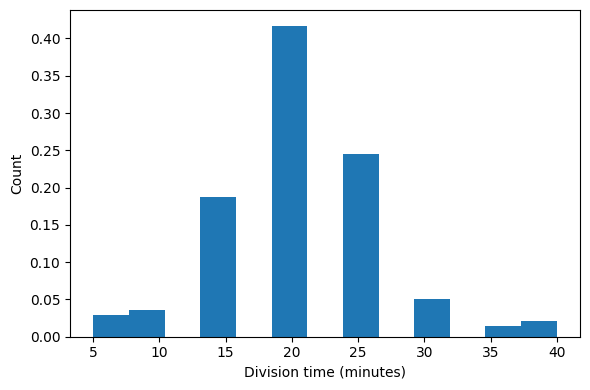

In [15]:
import matplotlib.pyplot as plt

def plot_division_time_distribution(
    counts: np.ndarray,
    bin_centers: np.ndarray,
    normalize: bool = False,
    title: str | None = None
) -> None:
  """Plot the division time distribution from histogram counts and bin centers.

  Parameters
  ----------
  counts
    Histogram counts per bin (shape: (n_bins,)).
  bin_centers
    Bin center locations in minutes (shape: (n_bins,)).
  normalize
    Normalize data before plotting
  title
    Optional plot title.

  """
  if counts.size == 0 or bin_centers.size == 0:
      raise ValueError("No data to plot: counts/bin_centers are empty.")

  if counts.shape[0] != bin_centers.shape[0]:
      raise ValueError("counts and bin_centers must have the same length.")

  if normalize:
    counts = counts / counts.sum() if counts.sum() > 0 else counts

  # Reconstruct edges -> widths from bin centers
  if bin_centers.size > 1:
      left_edge0 = bin_centers[0] - 0.5 * (bin_centers[1] - bin_centers[0])
      right_edgeN = bin_centers[-1] + 0.5 * (bin_centers[-1] - bin_centers[-2])
      mid_edges = 0.5 * (bin_centers[:-1] + bin_centers[1:])
      edges = np.concatenate(([left_edge0], mid_edges, [right_edgeN]))
      widths = np.diff(edges)
  else:
      # Single bin: choose a default width (e.g., 1 minute)
      widths = np.array([1.0], dtype=float)

  fig, ax = plt.subplots(figsize=(6, 4))
  ax.bar(bin_centers, counts, width=widths, align="center")
  ax.set_xlabel("Division time (minutes)")
  ax.set_ylabel("Count")
  if title:
      ax.set_title(title)
  fig.tight_layout()
  plt.show()

plot_division_time_distribution(division_times, bin_center, True)

# Multiple ways to analyze this experiment

Using the above experimental and processed data, here are four ways you could analyze the dynamics of bacteria growth.

1. Quantify the total area of bacteria per time and see if it follows the Exponential Growth or Logistic Growth equation.
2. Quanify the number of bacteria per time and see if it follows the Exponential Growth or Logistic Growth equation.
3. Quantify the mean time between cell divisions and compare it to the rate obtained using 1 and 2 above.
4. Quantify the full distribution of time between cell division across the entire dataset. Does it match your expectations?

In [ ]:
# dont need this becuase i have data

############
def run_simulated_experiment(n_traj,t_max,n_timepoints):

  x0 = initial_condition()
  S = stoichometry()
  pars = propensities()

  assert n_traj * n_timepoints <= 500, "n_traj * n_timepoints must be less than 1000"
  trajectory_times = np.linspace(0,t_max,n_timepoints)

  # Initialize the results
  trajectories = np.zeros((n_traj, len(trajectory_times)))
  for i in range(n_traj):
      trajectories[i,:] = gillespie1(x0, 0, t_max, S, pars, trajectory_times)

  return trajectories, trajectory_times, (x0,pars['k1'],pars['k2'])

n_traj = 10
t_max = 100
n_timepoints = 50
experimental_results, trajectory_times, experimental_parameters = run_simulated_experiment(n_traj,t_max,n_timepoints)
###################


In [28]:
from scipy.integrate import odeint
from scipy.optimize import minimize

In [44]:
# whats the max at each of the 21 timepoints
useful_data =np.max(mask_data,axis=(1,2))


In [57]:
mask_data[:].shape
# get the 21 time values from mask_data
#trajectory_times = mask_data.shape[0]
trajectory_times = np.arange(0,21,1) *5
trajectory_times

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

# define model ?

In [58]:
def W(x,t,pars):
  return np.array([pars['k1']*x[0]])

# Define the RHS of the ODE:
def dxdt(x,t,S,pars):
  return S @ W(x,t,pars=pars)

def ode_model(t, x0, k1):
  # Define the intial condition. It is now a parameter we are fitting for!
  x = np.array([x0])

  # Define the stoichiometry matrix as a 1 (species) by 2 (reaction) numpy array
  S=np.array([[1]])

  # Define the reaction rate parameters as a dictionary
  # These are now parameters we are fitting for!
  pars = {'k1': k1}
  # Units are:  k1 = (mg/mL) / minute
  #             k2 = 1 / minute

  # Pass the pars dictionary to the dxdt function
  trajectory=odeint(dxdt, x, t, args=(S, pars))

  return trajectory[:,0]

# error ?

In [59]:
def ode_error_function(params, t, data):
    x0, k1= params
    model_output = ode_model(t, x0, k1)
    return np.sum((model_output - useful_data)**2)


# im only looking for x0 and k1, but i kind of already know x0?
initial_guess = [8,0.5]
bounds = [(0, np.inf), (0, np.inf)]

result = minimize(ode_error_function, initial_guess, args=(trajectory_times,useful_data), bounds=bounds)

# Extract the fitted parameters
popt = result.x

In [80]:
result.x


array([6.67687289, 0.03126067])

# make graph
i dont have std and what would i even take the mean of

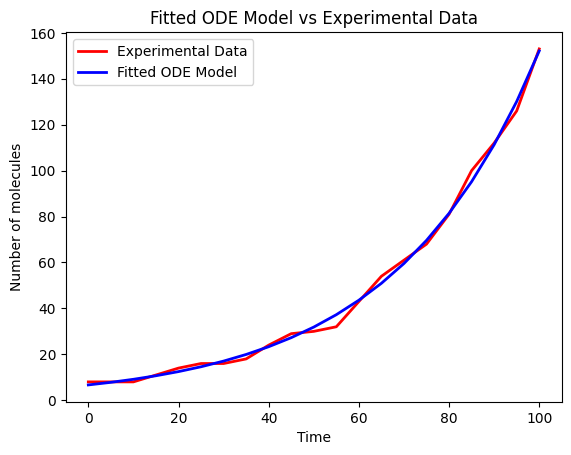

In [60]:
# Plot the mean of the experimental results
plt.plot(trajectory_times, useful_data, color='r', linewidth=2, label='Experimental Data')

# Plot the fitted ODE model
plt.plot(trajectory_times, ode_model(trajectory_times, *popt), color='b', linewidth=2, label='Fitted ODE Model')

plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Fitted ODE Model vs Experimental Data')
plt.legend()
plt.show()

#how long to divde != rate


In [81]:

# Define parameters for the exponential growth
N_0 = 6.67687289 # Initial number of cells
r =  0.03126067 # Growth rate of cells in generations per minute
total_time = 40 # Total time of the integration in minutes.

In [82]:

# Define parameters for the numerical integrator
delta_t = 5 # time step in minutes
n_time_steps = int(total_time / delta_t)

In [83]:
# Set up the empty vector where we will store the number of cells at time t.
N_t = np.zeros(n_time_steps)

# Set the initial condition by indexing the array.
N_t[0] = N_0

In [84]:

# Loop through each time step
# We say range(1, N) instead of range(N) to begin at index 1
for t in range(1, n_time_steps):

    # Calculate the change in the number of cells.
    dN = N_t[t - 1] * r * delta_t

    # Update the number of cells at the current time point
    N_t[t] = N_t[t - 1] + dN

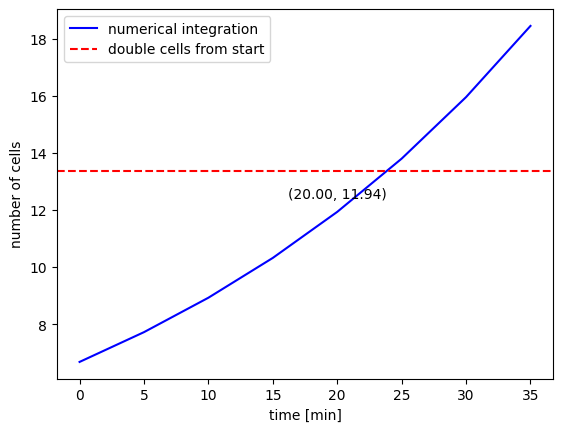

In [88]:
# Set up the time array for the x axis
# np.arange will arrange numbers from 0 to the total time, taking steps of dt
time_range = np.arange(0, total_time, delta_t)

# Plot our calculation as a blue line
plt.plot(time_range, N_t, 'b-', label='numerical integration')
#plot a line at 16 cells
plt.axhline(y=N_0 * 2, color='r', linestyle='--', label='double cells from start')
# label the coordinates where the lines interect

# Find the intersection points
intersection_indices = np.where(np.diff(np.sign(N_t - (N_0 * 2))))[0]
intersection_times = time_range[intersection_indices]
intersection_values = N_t[intersection_indices]

# Label the intersection points
for i in range(len(intersection_times)):
    plt.annotate(f'({intersection_times[i]:.2f}, {intersection_values[i]:.2f})',
                 (intersection_times[i], intersection_values[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


# Add an appropriate label and legend
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()
plt.show()

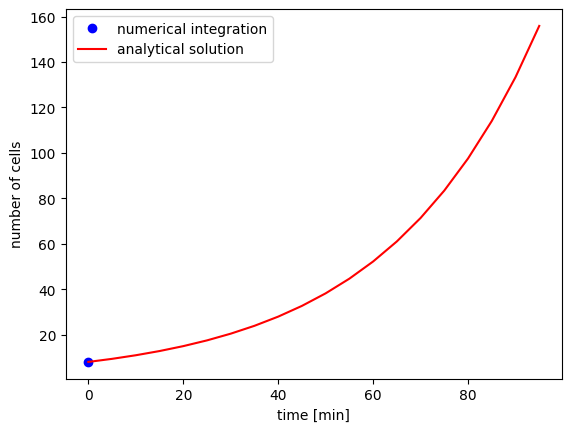

In [67]:

# Compute the analytical solution.
solution = N_0 * np.exp(r * time_range)

# Plot every 50 points from the numerical integration.
plt.plot(time_range[::50], N_t[::50], 'bo', label='numerical integration')

# Plot the analytical solution as a red line.
plt.plot(time_range, solution, 'r-', label='analytical solution')

# Add appropriate labels.
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

In [70]:

# Set the new parameters
delta_t_long = 5
n_time_steps_long = int(total_time / delta_t_long)

# Set the storage vector so we don't rewrite our correct approach
N_t_long = np.zeros(n_time_steps_long)
N_t_long[0] = N_0

# Loop through each time step
for t in range(1, n_time_steps_long):

    # Calculate the change in the number of cells.
    dN = N_t_long[t - 1] * r * delta_t_long

    # Update the number of cells at the current time point
    N_t_long[t] = N_t_long[t - 1] + dN

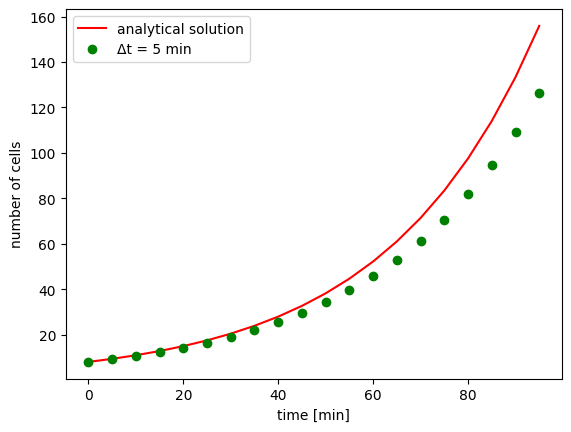

In [71]:

# Plot the analytical solution
plt.plot(time_range, solution, 'r-', label='analytical solution')

# Plot every fifth point from the long time step integration
time_range_long = np.arange(0, total_time, delta_t_long)
plt.plot(time_range_long, N_t_long, 'go', label='Δt = 5 min')

# Add labels as usual
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()


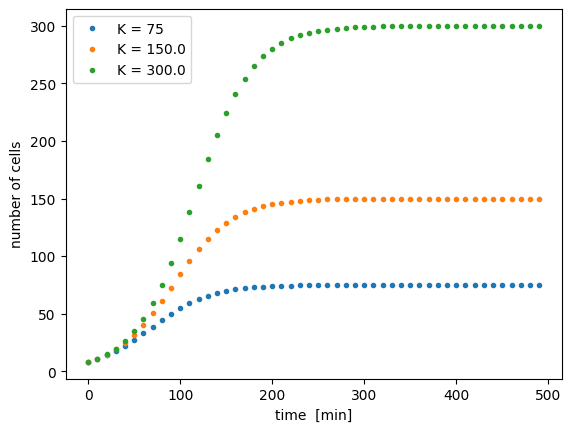

In [72]:

# Set the carrying capacity:
K = [75, 1.5E2, 3E2]

# Extend the total time of the integration
delta_t = 0.1
total_time = 500
time_range = np.arange(0, total_time, delta_t)
n_time_steps = int(total_time / delta_t)
# Set the storage vector so we don't rewrite our correct approach
N_t = np.zeros((len(K), n_time_steps))
N_t[:, 0] = N_0

# Loop through each carrying capacity
for k in range(len(K)):

    # Loop through each time step.
    for t in range(1, n_time_steps):

        # Calculate the change in the number of cells.
        dN = N_t[k, t - 1] * r * delta_t * (1 - N_t[k, t - 1] / K[k])

        # Update the number of cells at the current time point
        N_t[k, t] = N_t[k, t - 1] + dN

# Loop through the carrying capacities and plot every 100th point.
for i in range(len(K)):
    plt.plot(time_range[::100], N_t[i, ::100], '.', label='K = ' + str(K[i]))

# Add appropriate labels and legends.
plt.xlabel('time  [min]')
plt.ylabel('number of cells')
plt.legend()

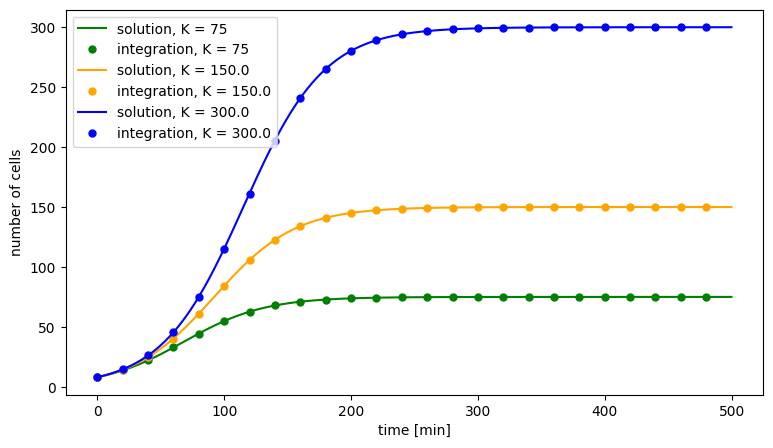

In [73]:

# Solve the analytical solution for our three carrying capacities.
solution = np.zeros((len(K), n_time_steps))
for i in range(len(K)):
    solution[i, :] = N_0 * K[i] / (np.exp(-r * time_range) * (K[i] - N_0) + N_0)

# Define the colors so they match up.
colors = ['green', 'orange', 'blue']

# Set up a figure that's a bit bigger
fig = plt.figure(figsize=(9, 5))

# Plot the analytical solutions and numerical integrations
for i in range(len(K)):
    # Analytical solution
    plt.plot(time_range, solution[i,:], color=colors[i],
             label='solution, K = ' + str(K[i]))

    # Numerical integration
    plt.plot(time_range[::200], N_t[i, ::200], '.', markersize=10, color=colors[i],
            label='integration, K = ' + str(K[i]))

# Add axis labels and a legend.
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()